In [1]:
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

import btk
import btk.plot_utils
import btk.survey
import btk.draw_blends
import btk.catalog
import btk.sampling_functions
import astropy.table


In [7]:
COSMOS_CATALOG_PATHS = "/sps/lsst/users/bbiswas/OneDegSq_snr_10.fits"

stamp_size = 20
min_number = 5
max_number = 5
batch_size = 2
maxshift = 5

catalog = btk.catalog.CatsimCatalog.from_file(COSMOS_CATALOG_PATHS)
survey = btk.survey.get_surveys("LSST")
seed = 5

sampling_function = btk.sampling_functions.DefaultSampling(
    max_number=max_number, min_number=min_number, max_shift=maxshift, stamp_size=stamp_size, seed=seed
)

draw_generator = btk.draw_blends.CatsimGenerator(
    catalog,
    sampling_function,
    survey,
    batch_size=batch_size,
    stamp_size=stamp_size,
    cpus=1,
    add_noise="all",
    augment_data=True,
    verbose=False,
    seed=seed,
)

In [8]:
blend = next(draw_generator)

Generating blends for LSST survey:   0%|          | 0/2 [00:00<?, ?it/s]

In [9]:
print(blend['blend_list'][0]['pa_disk'])
print(blend['blend_list'][0]['pa_bulge'])

     pa_disk      
------------------
 43.70313852959032
167.03429928291484
14.033145698027113
178.83105975340862
11.091029900198748
     pa_bulge     
------------------
23.760463892790483
167.03429928291484
14.033145698027113
254.00237780760858
 350.7011506734988


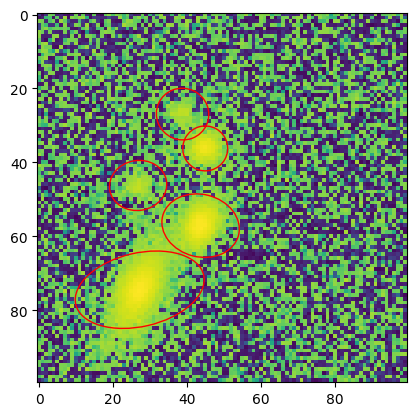

In [10]:
fig, ax = plt.subplots()
im = ax.imshow(np.arcsinh(blend['blend_images'][0, 2]))

# plot an ellipse for each object
for i in range(len(blend["blend_list"][0])):

    e = Ellipse(xy=(blend["blend_list"][0]['x_peak'][i], 
                    blend["blend_list"][0]['y_peak'][i]),
                width=3*5*(blend["blend_list"][0]["a_d"][i]+.81),
                height=3*5*(blend["blend_list"][0]["b_d"][i]+.81),
                angle=blend['blend_list'][0]['pa_bulge'][i],
               )

    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

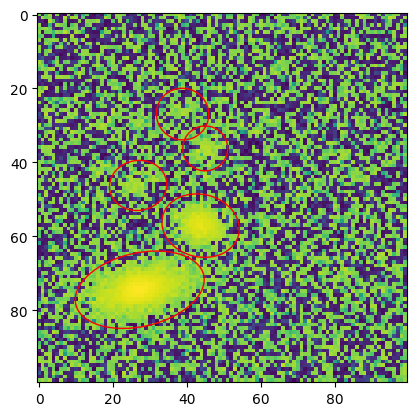

In [11]:
fig, ax = plt.subplots()
im = ax.imshow(np.arcsinh(blend['blend_images'][0, 5]))

# plot an ellipse for each object
for i in range(len(blend["blend_list"][0])):

    e = Ellipse(xy=(blend["blend_list"][0]['x_peak'][i], 
                    blend["blend_list"][0]['y_peak'][i]),
                width=3*5*(blend["blend_list"][0]["a_d"][i]+.81),
                height=3*5*(blend["blend_list"][0]["b_d"][i]+.81),
                angle=blend['blend_list'][0]['pa_bulge'][i],
               )

    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)